# An overview of SVM with case study

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import precision_recall_fscore_support

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

# load data into a pandas dataframe
data = pd.read_csv('drive/My Drive/Colab Notebooks/project/liverLabTrain1.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Preprocessing Data

### Removing Duplicates

In [0]:
data.shape

(583, 11)

In [0]:
data_duplicate = data[data.duplicated(keep = False)]
data_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [0]:
data = data[~data.duplicated(subset = None, keep = 'first')]
data.shape

(570, 11)

### Checking all null values

In [0]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64

In [0]:
print ("Length before removing NaN values:%d"%len(data))
data1 = data[pd.notnull(data['Albumin_and_Globulin_Ratio'])]
print ("Length after removing NaN values:%d"%len(data1))

Length before removing NaN values:570
Length after removing NaN values:566


### Printing rows with null values

In [0]:
data[~pd.notnull(data['Albumin_and_Globulin_Ratio'])]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


### Visualization during preprocessing

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


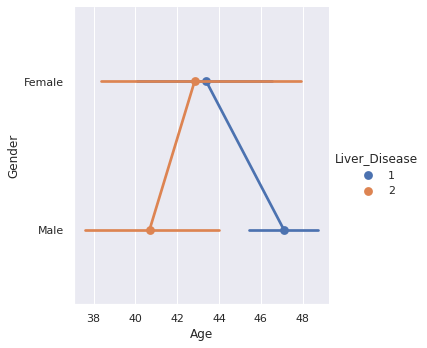

In [0]:
sns.factorplot (x="Age", y="Gender", hue="Liver_Disease", data=data);

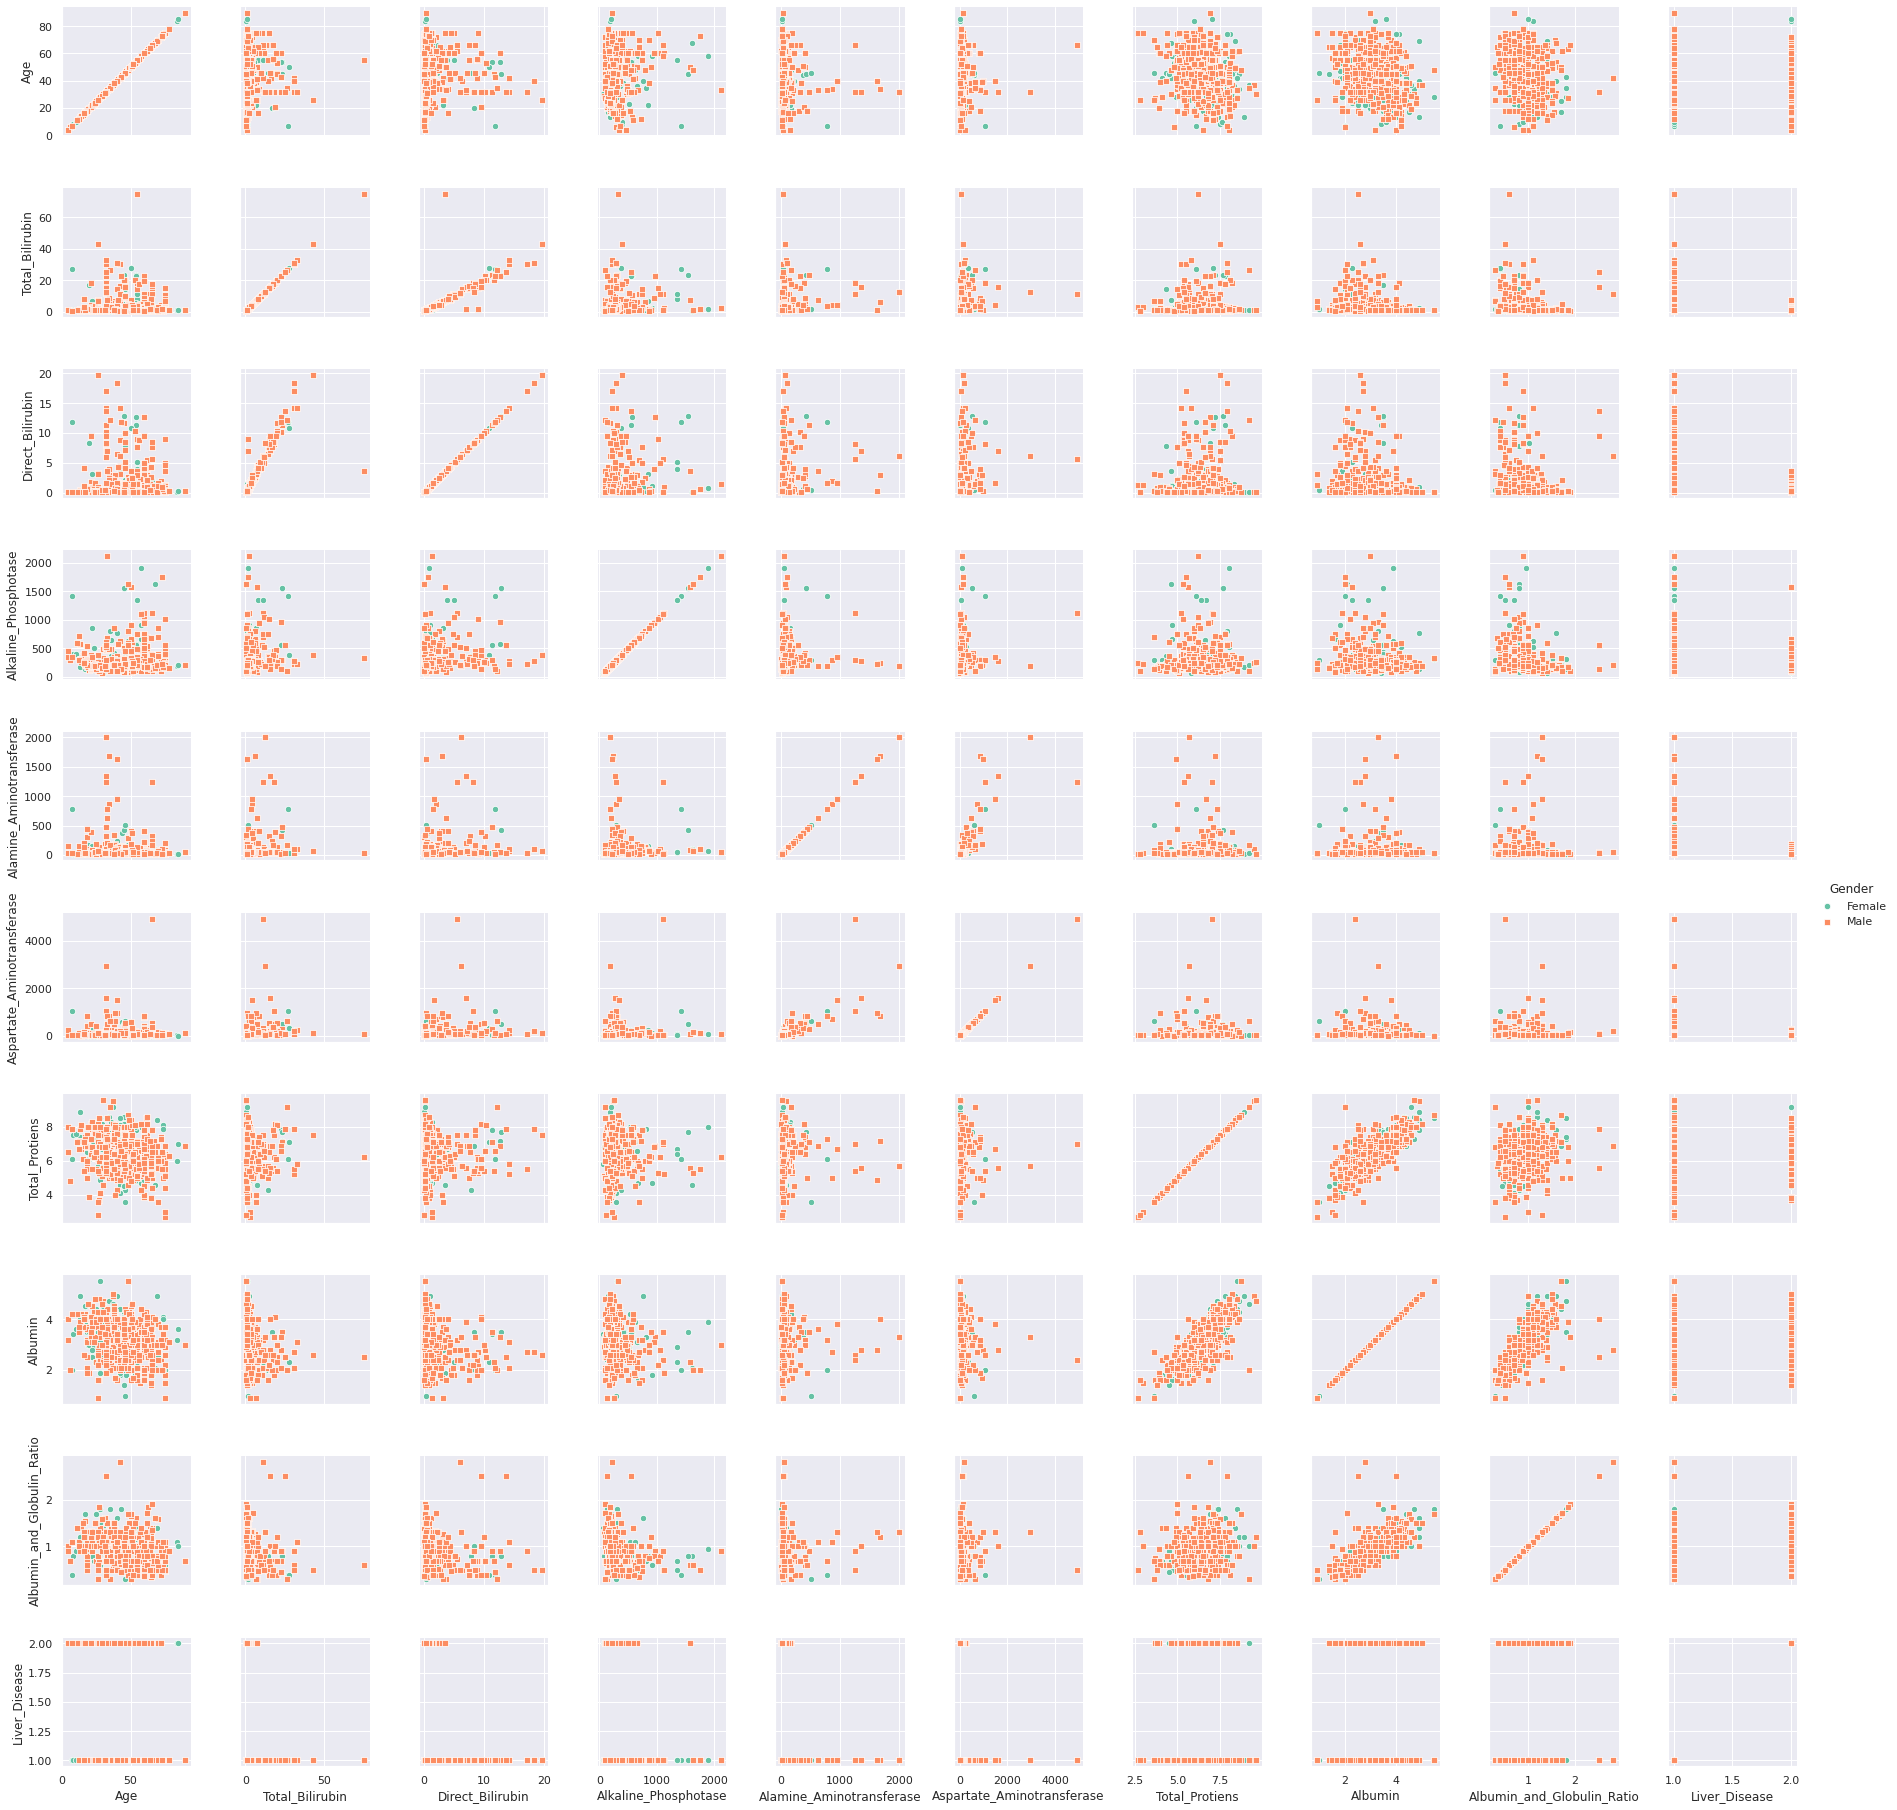

In [0]:
g = sns.PairGrid(data = data, hue = 'Gender', palette="Set2", hue_kws={"marker": ["o", "s"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

### Substituting the NaN value with mean value of the 'Albumin_and_Globulin_Ratio' column

In [0]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode().iloc[0])
data['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68, 1.9 , 1.7 , 1.8 , 0.3 , 0.97, 0.35,
       1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46, 0.39,
       1.02, 2.5 , 0.37])

In [0]:
data['Albumin_and_Globulin_Ratio'].value_counts()

1.00    108
0.80     62
0.90     57
0.70     53
1.10     45
       ... 
0.88      1
1.02      1
1.09      1
0.89      1
1.36      1
Name: Albumin_and_Globulin_Ratio, Length: 69, dtype: int64

In [0]:
print(data['Albumin_and_Globulin_Ratio'].median())
print(data['Albumin_and_Globulin_Ratio'].mean())

0.96
0.9483684210526319


### Binarizing the Gender and Liver_Disease column

In [0]:
def partition(x):
    if x =='Male':
        return 0
    return 1

data['Gender'] = data['Gender'].map(partition)

In [0]:
def partition(x):
    if x == 1:
        return 1
    return 0

data['Liver_Disease'] = data['Liver_Disease'].map(partition)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Dividing data in multiple classes

In [0]:
count_class_0, count_class_1 = data['Liver_Disease'].value_counts()
data_class0 = data[data['Liver_Disease'] == 0]
data_class1 = data[data['Liver_Disease'] == 1]

data = pd.concat([data_class0,data_class1.head(250)], axis=0)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,0
12,64,0,0.9,0.3,310,61,58,7.0,3.4,0.90,0
15,25,0,0.6,0.1,183,91,53,5.5,2.3,0.70,0
17,33,0,1.6,0.5,165,15,23,7.3,3.5,0.92,0
24,63,0,0.9,0.2,194,52,45,6.0,3.9,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...
352,26,1,0.7,0.2,144,36,33,8.2,4.3,1.10,1
353,48,1,1.4,0.8,621,110,176,7.2,3.9,1.10,1
354,48,1,0.8,0.2,150,25,23,7.5,3.9,1.00,1
356,33,0,0.7,0.2,256,21,30,8.5,3.9,0.80,1


## Log transform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf348a6518>,
      dtype=object)

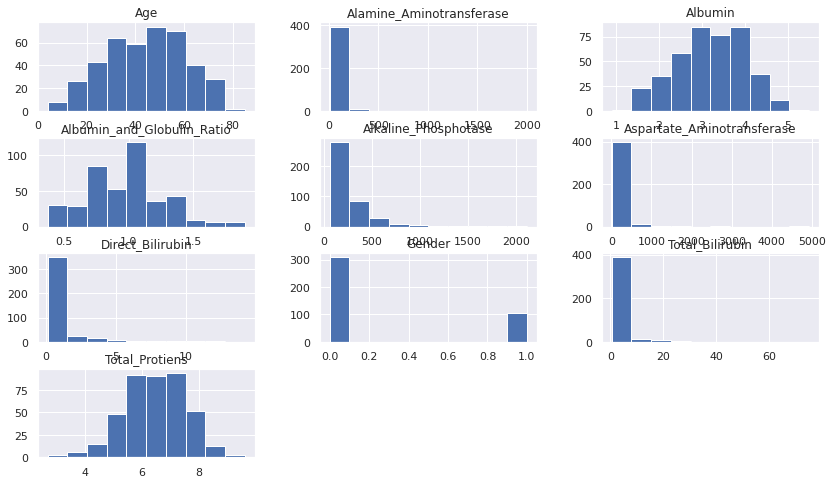

In [0]:
disease_initial = data['Liver_Disease']
features_initial = data.drop('Liver_Disease', axis = 1)

features_initial.hist(figsize=(14,8))

## Visualization

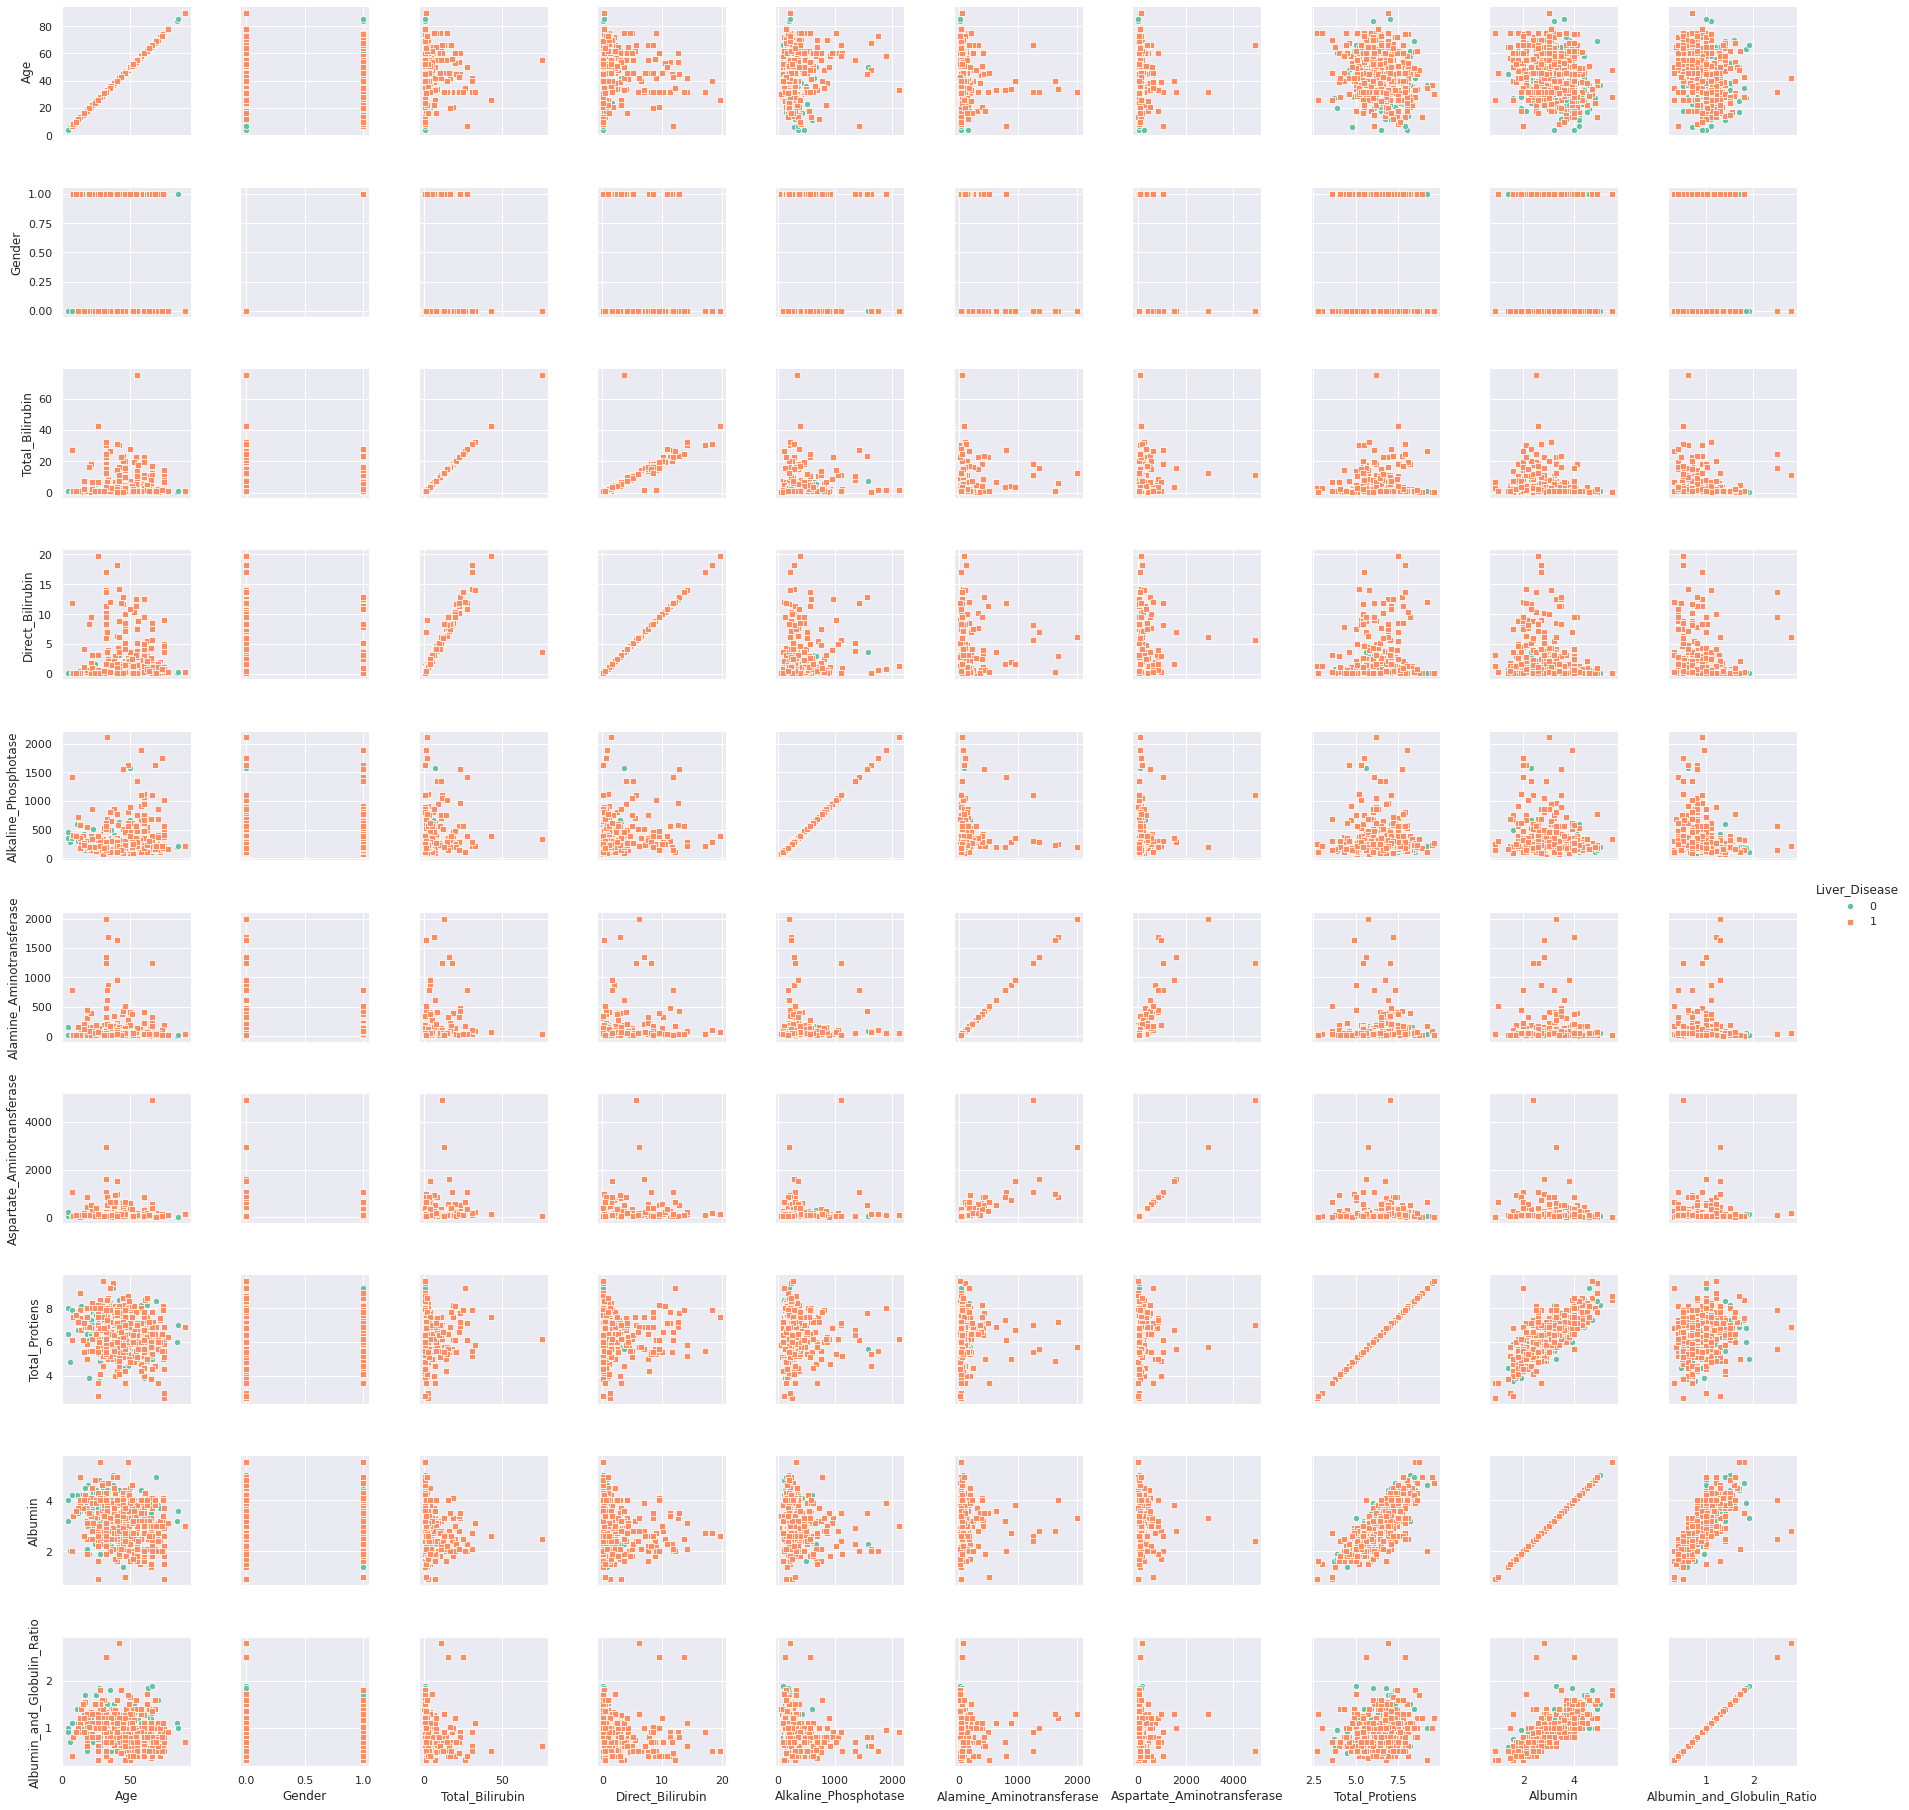

In [0]:
g = sns.PairGrid(data = data, hue = 'Liver_Disease', palette="Set2", hue_kws={"marker": ["o", "s"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

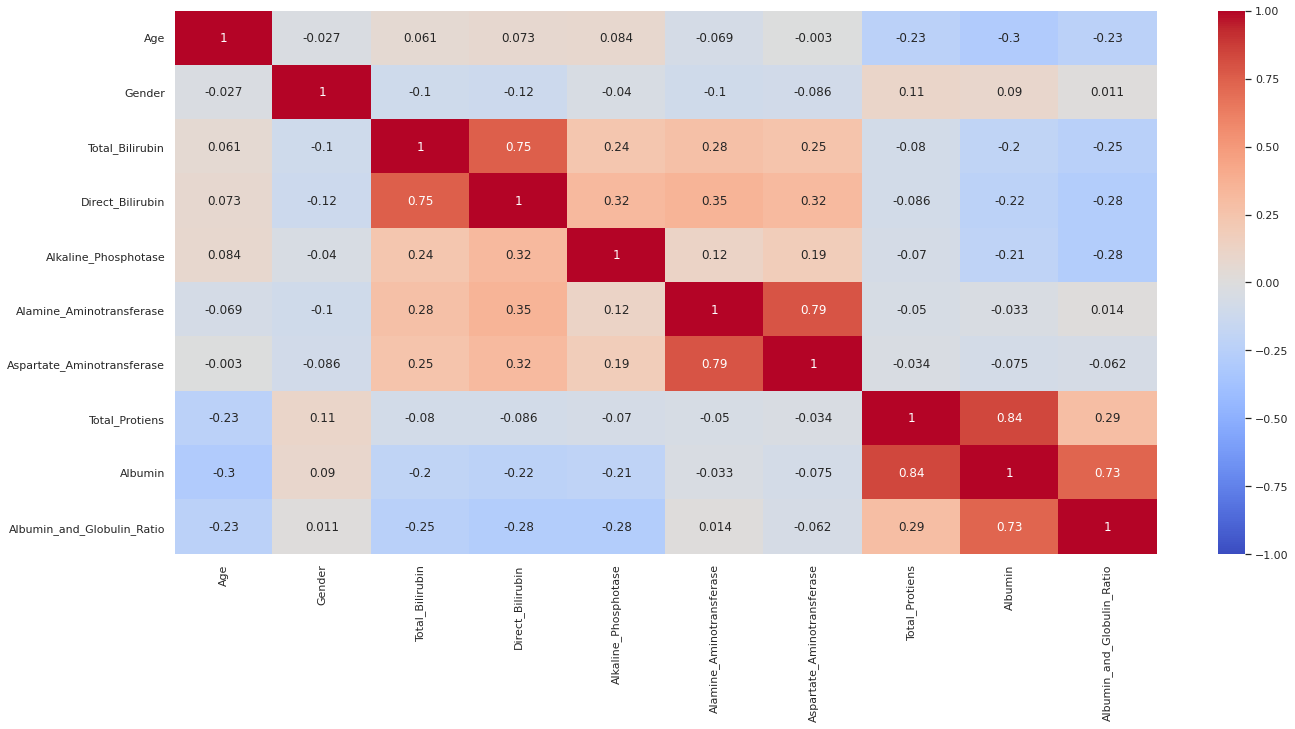

In [0]:
fig, ax = plt.subplots(figsize=(22,10)) 
ax = sns.heatmap(data.drop(['Liver_Disease'], axis=1).corr(), annot=True, vmin=-1,vmax=1, cmap='coolwarm', ax=ax)

# PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_new = pca.fit_transform(features_initial)

In [60]:
X_new

array([[-1.20732546e+02, -6.47278061e+01,  1.11302430e+01,
         2.72014263e+01, -3.32795356e-01,  5.75414294e-01],
       [-4.82673522e+01,  3.08029945e+01, -7.75813446e+00,
        -1.94646085e+01, -2.24775279e+00,  9.59811325e-01],
       [-6.26651930e+01, -9.71111017e+01, -3.17858232e+01,
         1.82639811e+01, -1.19557938e+00, -1.44923111e+00],
       ...,
       [-1.25787745e+02, -1.16496497e+02,  1.30573516e+01,
        -4.10390524e+00, -9.62939196e-01,  1.15483748e+00],
       [-1.01444636e+02, -1.31488761e+01,  1.53669112e+01,
         1.16325345e+01, -1.19985847e+00,  1.59866418e+00],
       [-9.06423581e+01, -6.80388967e+01, -4.01490364e+00,
         1.08880968e+01,  3.68879609e-01, -1.01440819e-01]])

## Scaling And Normalization

In [0]:
disease = data['Liver_Disease']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_initial, disease, test_size = 0.3, random_state = 99)

In [0]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# OverSampling

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=9)
X_train_1, Y_train_1 = sm.fit_sample(X_train, Y_train)
print ("Training set has {} samples.".format(X_train_1.shape[0]))

Training set has 346 samples.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Modelling

## SVM Trainning and Prediction

Support Vector Machine: SVM aims to find an optimal hyperplane that separates the data into different classes.

In [0]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_curve,auc,plot_confusion_matrix,roc_auc_score,confusion_matrix
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, accuracy_score

In [0]:
clf_SVM = SVC(random_state=99,gamma= 0.0000001,probability=True,kernel='linear')
clf_SVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='linear',
    max_iter=-1, probability=True, random_state=99, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
pred = clf_SVM.predict(X_test)
cm = confusion_matrix(Y_test,pred)

In [0]:
cm = np.array(confusion_matrix(Y_test,pred,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,67,10
No_Liver_Disease,37,11


### Receiver Operating Characteristic Curve

It plots the curve of True Positive Rate vs the False positive Rate, with a greater area under the curve indicating a better True Positive Rate for the same False Positive Rate.

This can be helpful in this case as simply knowing the number of correct predictions may not suffice.

For classifier Support Vector Classification, ROC score is 0.549648


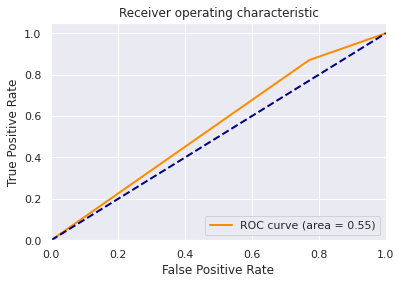

              precision    recall  f1-score   support

           0       0.52      0.23      0.32        48
           1       0.64      0.87      0.74        77

    accuracy                           0.62       125
   macro avg       0.58      0.55      0.53       125
weighted avg       0.60      0.62      0.58       125

F-score on testing data: 0.8131


In [36]:
fpr, tpr, _ = roc_curve(Y_test, pred)
roc_auc = auc(fpr, tpr)
print("For classifier %s, ROC score is %f" % ("Support Vector Classification",roc_auc))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(classification_report(Y_test, pred))
print("F-score on testing data: {:.4f}".format(fbeta_score(Y_test, pred, beta = 2)))

### Fine Tuning the Models

In [0]:
params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7],
                     'C': [1, 10, 100, 1000]}]

In [0]:
svm_model = GridSearchCV(SVC(kernel="rbf", probability=True, C=1000, gamma=0.0000001), params_grid, cv=9)
svm_model.fit(X_train, Y_train)

GridSearchCV(cv=9, error_score=nan,
             estimator=SVC(C=1000, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=1e-07,
                           kernel='rbf', max_iter=-1, probability=True,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05, 1e-06, 1e-07],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,y_predict)

In [0]:
cm = np.array(confusion_matrix(Y_test,y_predict,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,59,18
No_Liver_Disease,20,28


In [0]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60        48
           1       0.75      0.77      0.76        77

    accuracy                           0.70       125
   macro avg       0.68      0.67      0.68       125
weighted avg       0.69      0.70      0.69       125



For classifier Support Vector Classification, ROC score is 0.674784


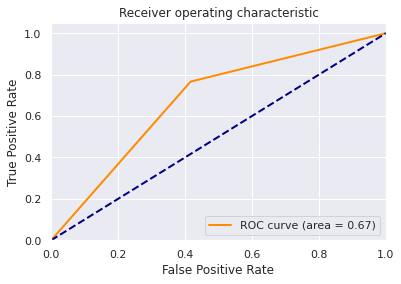

F-score on testing data: 0.8131


In [37]:
fpr, tpr, _ = roc_curve(Y_test, y_predict)
roc_auc = auc(fpr, tpr)
print("For classifier %s, ROC score is %f" % ("Support Vector Classification",roc_auc))
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
print("F-score on testing data: {:.4f}".format(fbeta_score(Y_test, y_predict, beta = 3)))

F-score on testing data: 0.7642


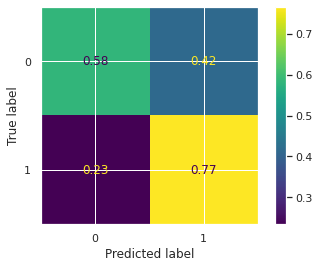

In [40]:
plot_confusion_matrix(svm_model, X_test, Y_test,normalize='true')

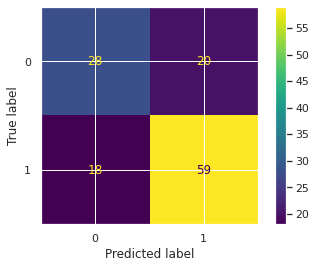

In [41]:
plot_confusion_matrix(svm_model, X_test, Y_test)